In [25]:
# download the dataset
import requests

r = requests.get('''https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression/housing_scale''')

In [26]:
# load the dataset
from sklearn.datasets import load_svmlight_file
from io import BytesIO

X, y = load_svmlight_file(f=BytesIO(r.content), n_features=13)
X = X.toarray()

In [27]:
import numpy

# preprocess
n_samples, n_features = X.shape
X = numpy.column_stack((X, numpy.ones((n_samples, 1))))
y = y.reshape((-1, 1))

In [28]:
# devide the dataset into traning set and validation set
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)

In [29]:
penalty_factor = 0.5  # L2 regular term coefficients
learning_rate = 0.0005
max_epoch = 200

losses_train = []
losses_val = []

In [30]:
# select different initializing method
w = numpy.zeros((n_features + 1, 1))  # initialize with zeros
# w = numpy.random.random((n_features + 1, 1))  # initialize with random numbers
# w = numpy.random.normal(1, 1, size=(n_features + 1, 1))  # initialize with zero normal distribution

In [31]:
for epoch in range(max_epoch):
    diff = numpy.dot(X_train, w) - y_train
    G = penalty_factor * w + numpy.dot(X_train.transpose(), diff)  # calculate the gradient
    G = -G
    w += learning_rate * G  # update the parameters

    Y_predict = numpy.dot(X_train, w)  # predict under the train set
    loss_train = numpy.average(numpy.abs(Y_predict - y_train))  # calculate the absolute differences
    losses_train.append(loss_train)

    Y_predict = numpy.dot(X_val, w)  # predict under the validation set
    loss_val = numpy.average(numpy.abs(Y_predict - y_val))  # calculate the absolute differences
    losses_val.append(loss_val)

Text(0.5,1,'The graph of absolute diff value varing with the number of iterations')

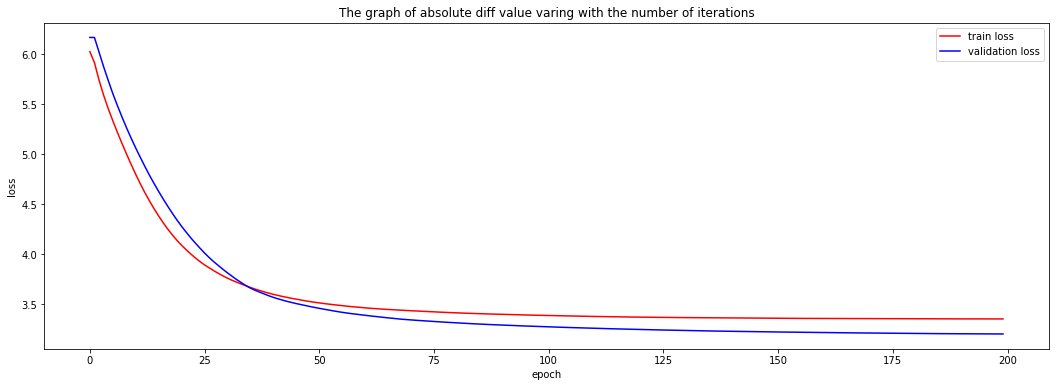

In [32]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
plt.plot(losses_train, "-", color="r", label="train loss")
plt.plot(losses_val, "-", color="b", label="validation loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.title("The graph of absolute diff value varing with the number of iterations")